In [ ]:
!python -m pip install pyyaml==6.0 # ymal 사용시 필요한 모듈
import sys, os, distutils.core
!git clone 'https://github.com/facebookresearch/detectron2' # detectron2 복사
dist = distutils.core.run_setup("./detectron2/setup.py") # detectron2 설치
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])} # detectron2 설치 시 필수 모듈 설치
sys.path.insert(0, os.path.abspath('./detectron2')) # detectron2 폴더 생성

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'detectron2' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch, detectron2 # 모듈 로딩
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2]) # torch 버전 확인
CUDA_VERSION = torch.__version__.split("+")[-1] # Cuda 버전 확인
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
torch:  1.13 ; cuda:  cu116
detectron2: 0.6


In [ ]:
import detectron2 
from detectron2.utils.logger import setup_logger # ? 세팅을 기록하는 역할 ?
setup_logger()

# 흔히 사용하는 모듈 로딩
import numpy as np
import os, json, cv2, random
# colab은 cv2.imshow가 충돌을 일으키기 때문에 코랩용 cv2_imshow를 사용용
from google.colab.patches import cv2_imshow

# detectron2 에서 흔히 사용하는 모듈 로딩
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# coco 포맷으로 되어있는 데이터로딩시 필요
from detectron2.data.datasets import register_coco_instances

from os import path
if __name__ == '__main__': # 바로 실행되는 조건문

    # coco json 파일 등록
    json_file_path = "/content/drive/MyDrive/trainval.json"
    # 이미지 데이터셋 위치 등록
    dataset_dir = "/content/drive/MyDrive/images/"
    # 데이터 로딩
    register_coco_instances("car_dataset", {}, json_file_path, dataset_dir)

    # 기본적인 config 파일 로딩
    cfg = get_cfg()
    # 사용할 모델의 config 파일과 병합
    cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

    # 데이터훈련에 사용할 데이터셋 지정
    cfg.DATASETS.TRAIN = ("car_dataset",)
    # 데이터테스트에 사용할 데이터셋 지정
    cfg.DATASETS.TEST = ()

    # 모델 가중치 등록
    cfg.MODEL.WEIGHTS = '/content/drive/MyDrive/model_final_f10217.pkl' # 모델 가중치가 등록되어 있는 파일 경로
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025
    cfg.SOLVER.MAX_ITER = 300
    cfg.SOLVER.STEPS = []

    # 모델 훈련
    trainer = DefaultTrainer(cfg)
    trainer.resume_or_load(resume=False)
    trainer.train()

[12/22 05:52:13 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

UnpicklingError: ignored

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
[]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]
frame112.png


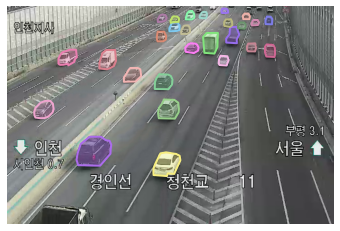

frame102.png


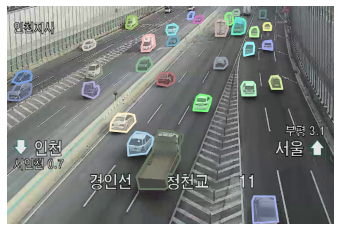

frame46.png


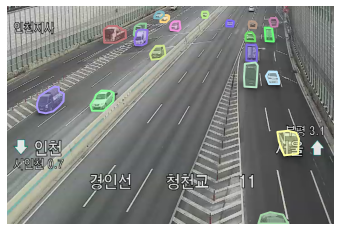

frame87.png


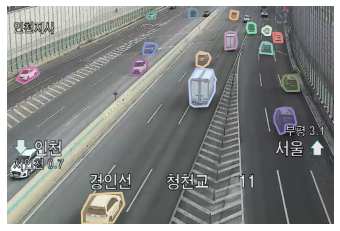

frame95.png


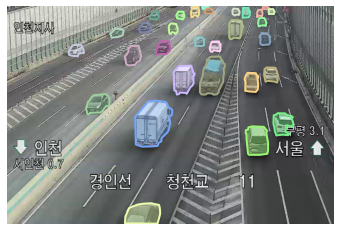

In [ ]:
from pycocotools.coco import COCO
from skimage import io
from matplotlib import pyplot as plt

coco = COCO(json_file_path)
catIds = coco.getCatIds(catNms=['*']) # 전체 img 번호를 들고올 리스트 생성
print(catIds)
imgIds = coco.getImgIds(catIds=catIds) # 전체 img 번호 로드한 리스트 생성성
print(imgIds)

# 5장의 이미지를 랜덤하게 가져와서 확인
for d in random.sample(imgIds, 5):
    img = coco.loadImgs(imgIds[d])[0]
    file_name = io.imread(dataset_dir +'/'+ img['file_name'])
    plt.axis('off')
    plt.imshow(file_name) # 이미지 그리기
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)
    # 파일 이름 출력
    print(img['file_name'])
    plt.show()

In [ ]:
# detectron의 기본적으로 훈련된 demo 파일을 사용하여 cctv 동영상 파일을 모델에 적용시킨 파일로 내보냄
%run detectron2/demo/demo.py --config-file detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml \
--video-input '/content/drive/MyDrive/cctv_mp4.mp4' --confidence-threshold 0.6 --output video-output.mkv \
--opts MODEL.WEIGHTS detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl

[12/22 02:13:03 detectron2]: Arguments: Namespace(confidence_threshold=0.6, config_file='detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl'], output='video-output.mkv', video_input='/content/drive/MyDrive/cctv_mp4.mp4', webcam=False)
[12/22 02:13:04 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:08, 21.6MB/s]                           

[12/22 02:13:12 fvcore.common.checkpoint]: [Checkpointer] Loading from /root/.torch/iopath_cache/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[12/22 02:13:12 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'



100%|██████████| 871/871 [02:58<00:00,  4.87it/s]


<Figure size 432x288 with 0 Axes>

In [ ]:
# 결과 다운로드
from google.colab import files
files.download('video-output.mkv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>